In [397]:
ITERATIONS = 20
import numpy as np

### Define Function f(x)

In [398]:
def f(x):
    return -(x**5)+5*(x**3)+20*x-5

---
### Some methods

In [399]:
### Initialize Position List
def Initialize_Position(List):
    return List

### Initialize Velocities
def Initialize_Velocities():
    return [0, 0, 0, 0]

### Get Local Best Position
def Get_Local_Best_Position(List, Current_Local_Best_Position):
    for i in range(4):
        if( f(List[i]) > f(Current_Local_Best_Position[i])):
            Current_Local_Best_Position[i] = List[i]
    return Current_Local_Best_Position

### Get Global Best Position
def Get_Global_Best_Position(List, Global_Best_Position):
    for i in range(4):
        if( f(List[i]) > Global_Best_Position):
            Global_Best_Position = List[i]
    return Global_Best_Position

### Get Velocities of Particles
def Get_Velocities_of_Particles(Local_Best_Position,
                                Global_Best_Position,
                                Current_Velocities,
                                Current_Position):
    New_Velocities = Initialize_Velocities() # ?
    w = c_1 = c_2 = 1
    r_1 = np.random.uniform(0, 1, 1)
    r_2 = np.random.uniform(0, 1, 1)

    for i in range(4):
        New_Velocities[i] = w*Current_Velocities[i]\
                            + c_1*r_1*(Local_Best_Position[i]-Current_Position[i])\
                            + c_2*r_2*(Global_Best_Position-Current_Position[i])
        New_Velocities[i] = float(New_Velocities[i])
    return New_Velocities

def Get_New_Positions(Velocities, Current_Position):
    New_Positions = Current_Position
    for i in range(4):
        New_Positions[i] = Velocities[i] + Current_Position[i]
    return New_Positions


## Let's Start

### Initialization

In [400]:
#x_1 = -2; x_2 = 0; x_3 = 1; x_4 = 3
#print(x_1)
#print(x_4)

# Set Initial Positions
x = [-2, 0, 1, 3]
print(x)

# Set weights vector
wcc = [1, 1, 1] # c_1 = c_2 = w = 1

Current_Position = Initialize_Position(x)
Current_Velocities = Initialize_Velocities()

# Initialize Local Best Position
Local_Best_Position = Current_Position

# Initialize Global Best Position
Global_Best_Position = Current_Position[0]
### Arbitrarily set a position as Global Best Position from Current_Position

# Claim a list to store historical positions, for plotting.
History_Position = []

[-2, 0, 1, 3]


In [401]:
for i in range(ITERATIONS):
    Local_Best_Position = Get_Local_Best_Position(Current_Position, Local_Best_Position)
    Global_Best_Position = Get_Global_Best_Position(Current_Position, Global_Best_Position)
    New_Velocities = Get_Velocities_of_Particles(Local_Best_Position,
                                                Global_Best_Position,
                                                Current_Velocities,
                                                Current_Position)
    Current_Position = Get_New_Positions(New_Velocities, Current_Position)
    print(f'Current Position: \n {Current_Position}')
    #print(np.array(Current_Position).shape)
    #History_Position.append(Current_Position)
    History_Position = np.concatenate((History_Position, Current_Position), axis=0)
    #print(f'History Position: \n {History_Position}\n')

Current Position: 
 [-1.8999807321216102, 0.03333975595946326, 1.0, 2.9333204880810735]
Current Position: 
 [0.7049833697828292, 0.901661123260943, 1.0, 1.196677753478114]
Current Position: 
 [0.8817206505691406, 1.0077034917327299, 1.0706949123145246, 1.196677753478114]
Current Position: 
 [1.0332086363116084, 1.0985962831782106, 1.1312901066115117, 1.196677753478114]
Current Position: 
 [1.1323312006352286, 1.1580698217723828, 1.17093913234096, 1.196677753478114]
Current Position: 
 [1.1680547936657113, 1.1795039775906724, 1.1852285695531528, 1.196677753478114]
Current Position: 
 [1.1853082608423668, 1.1898560578966657, 1.192129956423815, 1.196677753478114]
Current Position: 
 [1.1884144391120706, 1.1917197648584879, 1.1933724277316966, 1.196677753478114]
Current Position: 
 [1.1923103760076665, 1.1940573269958454, 1.194930802489935, 1.196677753478114]
Current Position: 
 [1.1946844179701495, 1.1954817521733352, 1.1958804192749282, 1.196677753478114]
Current Position: 
 [1.195603843

### Plot the Movement of Particles

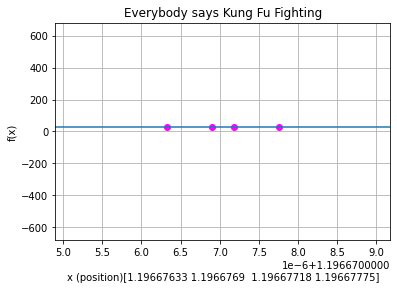

In [402]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
%matplotlib inline

fig = plt.figure()
# plt.ion()

for index in range(ITERATIONS):
    fig.clf()
    plt.title("Everybody says Kung Fu Fighting")

    x = np.arange(-4, 4, 0.01)
    function = -(x**5)+5*(x**3)+20*x-5
    particles_location_x = History_Position[index*4:index*4+4]
    particles_location_y = f(History_Position[index*4:index*4+4])

    plt.scatter(particles_location_x,particles_location_y,c='magenta')

    # np.set_printoptions(precision=8)
    plt.xlabel(f"\nx (position){particles_location_x}")
    plt.ylabel("f(x)")

    LB = 2*min(History_Position[index*4:index*4+4])\
             -max(History_Position[index*4:index*4+4])
    UB = 2*max(History_Position[index*4:index*4+4])\
            -min(History_Position[index*4:index*4+4])

    plt.xlim(LB, UB)
    plt.plot(x, function)
    plt.grid()

    display.clear_output(wait=True)
    plt.pause(0.2)

# plt.ioff()

plt.show()
